# **WA2 — Studying Studying: Is There A Recipe For High Marks in School?**

## **0.a Imports for Required Libraries**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

## **0.b Dataset Onboarding & Basic Renaming for Better Readability + Referenceability**

In [44]:
df1 = pd.read_csv("SAP-4000.csv")
df1 = df1.rename(columns={"Gender":"Sex", 
                          "HoursStudied/Week":"HoursPerWeekStudy", 
                          "Attendance(%)":"Attendance", 
                          "Exam_Score":"Score", 
                          "Parent Education":"ParentEdu"})
df1=df1.dropna(); df1

,Sex,HoursPerWeekStudy,Tutoring,Region,Attendance,ParentEdu,Score
0,Male,5.5,No,Urban,72.7,Tertiary,43.5
1,Female,6.8,No,Urban,62.0,Primary,51.7
2,Female,9.7,No,Rural,95.0,Secondary,70.1
5,Female,7.9,No,Urban,73.7,Tertiary,58.8
6,Female,7.6,No,Urban,79.5,Secondary,64.8
...,...,...,...,...,...,...,...
3995,Male,11.3,Yes,Urban,79.5,Secondary,93.5
3996,Male,3.7,Yes,Urban,50.7,Tertiary,53.8
3997,Female,0.0,No,Rural,72.7,Tertiary,25.4
3998,Male,4.0,No,Urban,62.2,Tertiary,40.3


## **1.a Introduction, About the Dataset, Intended Audience**

Academic examinations are employed by almost all educational programs across the world, and come in a variety of different configurations. These can range from a quick daily quiz on the previous lecture material to a cumulative marathon scantron encompassing a semester's worth of content. It's almost guaranteed that a test that a student takes in his lifetime will each be unique from all others from the past. 

However, for almost all tests, there is a general strategy for success that seems to be replicatable for basically everyone. If one was to go around and ask other students how they are able to succeed on tests, the advice would be relatively summed up by these three points:

1) Learn new material. 

2) Review/relearn past material as you progress into newer material.

3) Practice answering questions that emulate those from the test. 

It would make sense too — if we were to take a panel of top scorers from the AP Calculus BC exam from last year, it is sensible these students knew the material well, relearned/reviewed older material, and practiced MCQ and FRQ questions from past years. 

An exam called the Evaluación de Bachillerato para el Acceso a la Universidad (EBAU), which is also better known as the Selectividad, is a college-entrance exam and verification of completion of secondary school that is taken by students after finishing the equivalent of high school. A mark on the Selectividad can make or break a student's future in higher education, so doing well is vital. 

However, the general strategy drawn above can easily be disrupted. Here are some examples: 

1) John is a high school senior in Calculus. He transferred from a country that did not require anything above the equivalent of Algebra I to be taken. As such, the highest level of math John knows is Alg I. John subsequently cannot even complete 1) because he is unable to learn due to the fact that he lacks a foundation in mathematics. 

2) Ben is a classmate of John, also a senior, but has been attending school in the area since 1st grade. He has all the Precalc prereqs to learn new material, but the course materials and resources are online, and Ben does not have a computer at home, meaning his ability to review on his own time is limited to when he is at school or at the library / coffee shop. 

3) Peter is also a classmate of John and Ben. Senior, attending school in the area since 1st grade. While Peter is the most prepared of the three, he is unable to practice test questions because this year, the Calculus exam has been majorly revamped. Suddenly, all the questions are different enough that the last test's questions are inadequate. 

As such, it becomes apparent that being able to predict test scores from demographics could allow intervention during the learning process to hopefully improve scores in the future, rather than finding out later that students were struggling and recieving disappointing scores. 

This dataset was obtained from Kaggle.com's extensive supply of datasets, and contains 4,000 anonymized datapoints containing fields about a student's demographic information (Gender, HoursStudied/Week, Tutoring?, Urban/Rural, Attendance Rate, Highest Level of Parent Education) as well as respective student's mark on the Selectividad. While this dataset is pretty great, there were about 422 datapoints that were dropped because they were missing data in some fields. This can be considered a considerable portion of the original data that was trimmed away, and this is my disclaimer, if this trimming has any statistically significant impact on the findings. 

This project and literate programming document, methods, and its findings are targetted towards parents, educators, and governments. It should serve to inform and guide future actions, policies, and regulations in the common interest for a smarter and more capable next generation of minds. 

## **1.b Statement of Argument**

My prediction is that, on average, classifying as RURAL, NO for Tutoring, Primary for ParentEdu, or having low HoursPerWeekStudy will decrease the average score. If we really dumb these down, on average, we would likely expect that a large number of students with ALL of these traits will have low average scores. 

I like to argue that a student's performance on the Selectividad **IS HIGHLY CORRELATED** with the fields provided in the SAP-4000 dataset — in other words, given a substantial amount of data about students, we can predict a student's score with enough accuracy for IRL implementations for "educational measures". This would mean that an "at risk for failing" group would receive additional instruction time and guidance to help them out.  

The broader implication of this is that we can basically guarantee or drastically increase the chances that any student can take on the career they want to pursue. If a rural girl wants to be head neurosurgeon in 20 years, our education system allows a passionate first gen rural girl who's never seen the outside of her family farm to do what she loves, and actually compete with someone like a burnt out nepo baby white privileged male who has a lineage of neurosurgery in the family, and therefore doesn't have to work hard at all to get his job compared to the rural girl. 

## **2. Placeholder**

## **3. EDA**

This is a fun section because key insights about the data that can answer a lot of question can be revealed with speed and ease. 

First, I simply want to look at the distribution of Rural vs Urban students. From the code, it becomes clear that Urban students outnumber Rural ones. There are multiple explanations for this:

1) More adults live in cities than in rural areas, and assuming that the average number of children per couple is the same for both regions, Urban would have more students that go on to outnumber their rural counterparts in this dataset.

2) Urban students are more likely to reach the point of taking the Selectividad than Rural ones. This metric would be based on percentage of Urban students who make it, and percentage of Rural students who make it, rather than raw counts. 

3) Urban couples have a higher average children per couple than Rural couples. 

There are likely more reasons, and the disparity between the two is likely a combination of all of the relevant factors. 

In [45]:
df1.groupby("Region").agg("count").reset_index()[["Region", "Score"]]

,Region,Score
0,Rural,1404
1,Urban,2174


Here are the summary stats for how Selectividad scores for URBAN students stratified by ParentEdu (Primary, Secondary, Tertiary) differ from having No Tutor to Yes Tutor. If my explanation is too long, the below vars and code should be pretty self explanatory as to how I filtered for and obtained my statistics. 

An interesting observation that we can observe is how for students who are URBAN and have NO TUTOR, higher parent education level is correlated with higher mean, min, q1, median, and q3 test scores on the Selectividad. The jump from PRIMARY to TERTIARY for parental education level leads to about +4 for mean, +8 for min, +3 for median. I'm not going to list them all out, but the general trend is that higher parental education level is correlated with an *appreciable* increase in Selectividad test score.

A similar trend is present for the students who have YES TUTOR, where on average, having higher parental education levels is correlated with higher test scores for the student. 

Another interesting note is that the students who had a tutor seemed to do significantly better than those without. Whether this is really just answering YES or NO to the question: Are you absoletely loaded with money? is outside the scope of my argument, but still, it's interesting. Mean scores for NO TUTOR were 66.7, 68.3, and 70.3 for P, S, and T resp. For YES TUTOR, these means were 79.5, 82.1, and 83.7. 

The difference in having a tutor or not, creates a gap of ~9.2 points, and this is compared between the best of NO TUTOR, and the worst of YES TUTOR. Comparing equivalent parental education levels between the groups makes this comparison seem downright unfair, with differeneces being ~10pts for the Secondary groups, to ~13pts for the P and T groups. 

Essentially, on average, a family can buy 10 points on the selectividad. 

In [46]:
# Urban, P/S/T, No Tutor

urbanPrimaryNotutScore = df1[(df1.Region=="Urban") & (df1.ParentEdu=="Primary") & (df1.Tutoring=="No")].Score.describe().to_dict()
urbanSecondaryNotutScore = df1[(df1.Region=="Urban") & (df1.ParentEdu=="Secondary") & (df1.Tutoring=="No")].Score.describe().to_dict()
urbanTertiaryNotutScore = df1[(df1.Region=="Urban") & (df1.ParentEdu=="Tertiary") & (df1.Tutoring=="No")].Score.describe().to_dict()

print(f"urbanPrimaryNotutScore {urbanPrimaryNotutScore} \nurbanSecondaryNotutScore {urbanSecondaryNotutScore} \nurbanTertiaryNotutScore {urbanTertiaryNotutScore}")

urbanPrimaryNotutScore {'count': 332.0, 'mean': 66.70481927710843, 'std': 15.27203200620862, 'min': 20.0, '25%': 55.7, '50%': 67.35, '75%': 78.45, 'max': 100.0} 
urbanSecondaryNotutScore {'count': 681.0, 'mean': 68.31424375917769, 'std': 16.00829802447762, 'min': 21.6, '25%': 57.2, '50%': 68.6, '75%': 80.4, 'max': 100.0} 
urbanTertiaryNotutScore {'count': 499.0, 'mean': 70.30981963927856, 'std': 15.893585751481439, 'min': 27.9, '25%': 59.4, '50%': 70.8, '75%': 82.05000000000001, 'max': 100.0}


In [47]:
# Urban, P/S/T, Yes Tutor

urbanPrimaryYestutScore = df1[(df1.Region=="Urban") & (df1.ParentEdu=="Primary") & (df1.Tutoring=="Yes")].Score.describe().to_dict()
urbanSecondaryYestutScore = df1[(df1.Region=="Urban") & (df1.ParentEdu=="Secondary") & (df1.Tutoring=="Yes")].Score.describe().to_dict()
urbanTertiaryYestutScore = df1[(df1.Region=="Urban") & (df1.ParentEdu=="Tertiary") & (df1.Tutoring=="Yes")].Score.describe().to_dict()

print(f"urbanPrimaryYestutScore {urbanPrimaryYestutScore} \nurbanSecondaryYestutScore {urbanSecondaryYestutScore} \nurbanTertiaryYestutScore {urbanTertiaryYestutScore}")

urbanPrimaryYestutScore {'count': 142.0, 'mean': 79.46478873239437, 'std': 15.162796001370028, 'min': 41.1, '25%': 70.175, '50%': 80.55000000000001, '75%': 90.75, 'max': 100.0} 
urbanSecondaryYestutScore {'count': 306.0, 'mean': 82.11307189542484, 'std': 14.229434710200659, 'min': 36.1, '25%': 72.42500000000001, '50%': 82.55000000000001, '75%': 94.875, 'max': 100.0} 
urbanTertiaryYestutScore {'count': 214.0, 'mean': 83.68691588785046, 'std': 14.227428935178978, 'min': 37.3, '25%': 74.7, '50%': 84.55, '75%': 97.725, 'max': 100.0}


I want to check something though: how does RURAL vs URBAN play a role here?

The interesting answer is that it depends on what your situation is. I'm going to use median for the measure of central tendency for the test scores because I expect score dists to be skewed in some way.  

For students with NO TUTOR, the difference between URBAN and RURAL is roughly +3pts for students with parents with P, S, and T. Interestingly, this doesn't reflect for those with YES TUTOR, as the RURAL vs URBAN difference is only roughly +1pt. But, there is an exception: for students who have both YES TUTOR and TERTIARY parental education, the difference is, yet again, +3pts. 

Yet another interesting observation is that the interquartile range (25%tile to 75%tile) of every one of these groups is around 20pts, which means that despite these factors changing, no group is *significantly more consistent* or variable than the next. Standard deviations also reflect this fact that no one group is significantly more variable or less variable than the next, with std values hovering around 14-16pts. 

In [48]:
w1=df1[(df1.Region=="Rural") & (df1.ParentEdu=="Primary") & (df1.Tutoring=="No")].Score.describe().to_dict()
w2=df1[(df1.Region=="Urban") & (df1.ParentEdu=="Primary") & (df1.Tutoring=="No")].Score.describe().to_dict()
w3=df1[(df1.Region=="Rural") & (df1.ParentEdu=="Secondary") & (df1.Tutoring=="No")].Score.describe().to_dict()
w4=df1[(df1.Region=="Urban") & (df1.ParentEdu=="Secondary") & (df1.Tutoring=="No")].Score.describe().to_dict()
w5=df1[(df1.Region=="Rural") & (df1.ParentEdu=="Tertiary") & (df1.Tutoring=="No")].Score.describe().to_dict()
w6=df1[(df1.Region=="Urban") & (df1.ParentEdu=="Tertiary") & (df1.Tutoring=="No")].Score.describe().to_dict()

print(f"Rural Primary No{w1} \nUrban Primary No{w2}\nRural Secondary No{w3}\nUrban Secondary No{w4}\nRural Tertiary No{w5}\nUrban Tertiary No{w6}")

Rural Primary No{'count': 227.0, 'mean': 62.82731277533039, 'std': 14.879954839353772, 'min': 16.6, '25%': 54.1, '50%': 63.0, '75%': 72.1, 'max': 95.3} 
Urban Primary No{'count': 332.0, 'mean': 66.70481927710843, 'std': 15.27203200620862, 'min': 20.0, '25%': 55.7, '50%': 67.35, '75%': 78.45, 'max': 100.0}
Rural Secondary No{'count': 415.0, 'mean': 63.71566265060241, 'std': 15.178557863747088, 'min': 23.4, '25%': 52.8, '50%': 63.4, '75%': 74.8, 'max': 100.0}
Urban Secondary No{'count': 681.0, 'mean': 68.31424375917769, 'std': 16.00829802447762, 'min': 21.6, '25%': 57.2, '50%': 68.6, '75%': 80.4, 'max': 100.0}
Rural Tertiary No{'count': 318.0, 'mean': 67.18993710691824, 'std': 15.327098926744995, 'min': 24.6, '25%': 57.4, '50%': 67.6, '75%': 77.775, 'max': 100.0}
Urban Tertiary No{'count': 499.0, 'mean': 70.30981963927856, 'std': 15.893585751481439, 'min': 27.9, '25%': 59.4, '50%': 70.8, '75%': 82.05000000000001, 'max': 100.0}


In [49]:
v1=df1[(df1.Region=="Rural") & (df1.ParentEdu=="Primary") & (df1.Tutoring=="Yes")].Score.describe().to_dict()
v2=df1[(df1.Region=="Urban") & (df1.ParentEdu=="Primary") & (df1.Tutoring=="Yes")].Score.describe().to_dict()
v3=df1[(df1.Region=="Rural") & (df1.ParentEdu=="Secondary") & (df1.Tutoring=="Yes")].Score.describe().to_dict()
v4=df1[(df1.Region=="Urban") & (df1.ParentEdu=="Secondary") & (df1.Tutoring=="Yes")].Score.describe().to_dict()
v5=df1[(df1.Region=="Rural") & (df1.ParentEdu=="Tertiary") & (df1.Tutoring=="Yes")].Score.describe().to_dict()
v6=df1[(df1.Region=="Urban") & (df1.ParentEdu=="Tertiary") & (df1.Tutoring=="Yes")].Score.describe().to_dict()

print(f"Rural Primary Yes{v1} \nUrban Primary Yes{v2}\nRural Secondary Yes{v3}\nUrban Secondary Yes{v4}\nRural Tertiary Yes{v5}\nUrban Tertiary Yes{v6}")

Rural Primary Yes{'count': 112.0, 'mean': 78.8, 'std': 14.256580588980308, 'min': 49.2, '25%': 67.4, '50%': 79.3, '75%': 89.725, 'max': 100.0} 
Urban Primary Yes{'count': 142.0, 'mean': 79.46478873239437, 'std': 15.162796001370028, 'min': 41.1, '25%': 70.175, '50%': 80.55000000000001, '75%': 90.75, 'max': 100.0}
Rural Secondary Yes{'count': 188.0, 'mean': 79.90478723404256, 'std': 13.507927102516323, 'min': 36.5, '25%': 72.2, '50%': 81.75, '75%': 90.2, 'max': 100.0}
Urban Secondary Yes{'count': 306.0, 'mean': 82.11307189542484, 'std': 14.229434710200659, 'min': 36.1, '25%': 72.42500000000001, '50%': 82.55000000000001, '75%': 94.875, 'max': 100.0}
Rural Tertiary Yes{'count': 144.0, 'mean': 80.82916666666667, 'std': 15.029392531308106, 'min': 35.9, '25%': 70.875, '50%': 81.2, '75%': 93.975, 'max': 100.0}
Urban Tertiary Yes{'count': 214.0, 'mean': 83.68691588785046, 'std': 14.227428935178978, 'min': 37.3, '25%': 74.7, '50%': 84.55, '75%': 97.725, 'max': 100.0}


## **4.0 Modeling**

In [50]:
df1.columns  # for (my) reference, do not get me wrong this is NOT for you..

Index(['Sex', 'HoursPerWeekStudy', 'Tutoring', 'Region', 'Attendance',
       'ParentEdu', 'Score'],
      dtype='object')

Since models only work with numerical values, we might as well convert the entire dataset into numbers. It doesn't really matter what, as the relative structure is maintained between observations. 

In [51]:
dfMother = df1  # fork df1

In [52]:
df1["Sex"] = df1.Sex.apply(lambda x: 0 if x=="Male" else 1)  # Males = 0, Females = 1
df1["Tutoring"] = df1.Tutoring.apply(lambda y: 0 if y=="No" else 1)  # No TUT = 0, Yes TUT = 1
df1["Region"] = df1.Region.apply(lambda z: 0 if z=="Rural" else 1)  # Rural = 0, Urban = 1
df1["Attendance"] = df1.Attendance.apply(lambda normalize: normalize/100);  # Turns Attendance from %age into 0 to 1 scale
key1 = {"Primary":0, "Secondary":1, "Tertiary":2};  df1["ParentEdu"] = df1["ParentEdu"].map(key1)  # 0 = Primary, 1 = Secondary, 2 = Tertiary
df1["Score"] = df1.Score.apply(lambda normalize: normalize/100); df1  # Same as Attendance


,Sex,HoursPerWeekStudy,Tutoring,Region,Attendance,ParentEdu,Score
0,0,5.5,0,1,0.727,2,0.435
1,1,6.8,0,1,0.620,0,0.517
2,1,9.7,0,0,0.950,1,0.701
5,1,7.9,0,1,0.737,2,0.588
6,1,7.6,0,1,0.795,1,0.648
...,...,...,...,...,...,...,...
3995,0,11.3,1,1,0.795,1,0.935
3996,0,3.7,1,1,0.507,2,0.538
3997,1,0.0,0,0,0.727,2,0.254
3998,0,4.0,0,1,0.622,2,0.403


In [53]:
X = df1[["Sex", "HoursPerWeekStudy", "Tutoring", "Region", "Attendance", "ParentEdu"]]
y = df1["Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1728) 

After setting up the dataset and doing the TTS (test=25%) for X and y, we are ready to initialize and fit our models. For the sake of simplicity, I have done one model using linear regression, and one with logistic regression. Usually with simpler datasets like the one I'm using, a simpler model will more than suffice. From my experience, using too complex of a model on a simple dataset wastes time and compute, all to end up with the linear regression model doing better with absoletely zero optimization. 

For this case, this may be true. Linear regression does relatively well, as 0.91 is decent for a model. However, note that this is not accuracy, this is the correlation coefficient. Still, a value of 0.91 suggests that a linear regression line of best fit would do a good job of predicting a general estimate for a student's score on the Selectividad. 

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print(f"r2:{r2}, mse:{mse}")

r2:0.910695752483676, mse:0.0025096379277845323


In [55]:
nodel = RandomForestRegressor(n_estimators=50, random_state=42)
nodel.fit(X_train, y_train)
y_predict_nodel = nodel.predict(X_test)

r2_nod = r2_score(y_test, y_predict_nodel)
mse_nod = mean_squared_error(y_test, y_predict_nodel)

print(f"r2:{r2_nod}, mse:{mse_nod}")

r2:0.8962868358819116, mse:0.0029145589097956297


## **4.1 Significance Testing**

I would like the thank the guidance of this article: https://rviews.rstudio.com/2022/05/25/calling-r-from-python-with-rpy2/ as well as some code written by ChatGPT 5. I wanted to keep everything within one Jupyter notebook, but doing so with more than one language (Python + R) raises additional challenges, especially with the setup of the rpy2 library and making everything work inside of Python. 

The goal of this part of the project is to establish signiicance (or the lack of it) for a linear regression model. I will be using what I've learned this summer from ECON203 in statistics and R to be conducting significance tests. 

I will begin with a few blocks of code for setting up R to work inside this notebook, and then I will proceed with the tests.

In [ ]:
# Import libraries

from rpy2.robjects import conversion
from rpy2.robjects import pandas2ri

from rpy2.robjects import r, conversion, pandas2ri
from rpy2.robjects.conversion import localconverter

A standard part of regression is making sure that each scatterplot of (Xi, Y) is approximately linear. If not, we can apply a log_e() transform to that variable to linearalize it and make it a better candidate for the lm(). Here are the six scatterplots for the six different variables of X in the dataset. 

If a graph title has something like (Female?) this indicates that this is a dummy variable representing boolean data, like Female vs Non-Female. A variable being boolean will be pretty obvious, but the label of "Female?" is to help read the graph better.  

<Axes: title={'center': 'Sex vs Score Scatterplot (Female?)'}, xlabel='Sex', ylabel='Score'>

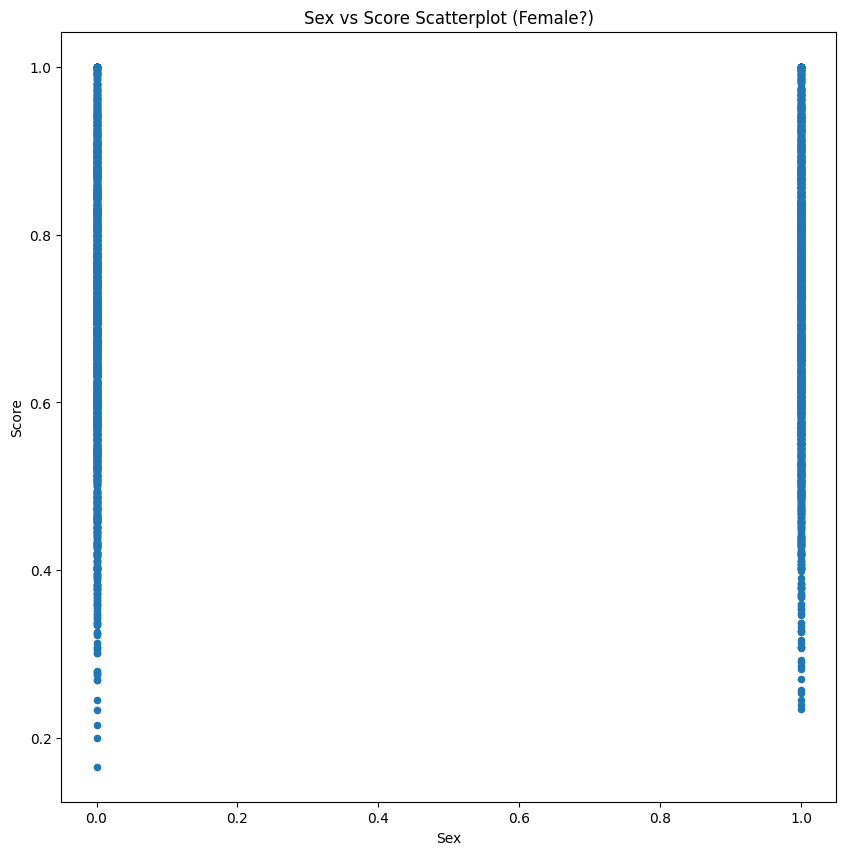

In [105]:
df1.plot.scatter("Sex", "Score", title="Sex vs Score Scatterplot (Female?)", figsize=(10,10))

The graph below is actually decently good, with a moderate, positive, linear relationship. One limitation I've observed from it is that the hrs/wk caps at 16, suggesting that there was an artificial limit during data collection set at x=16. I'm also a bit skeptical about this data because it is self generated, and a student, knowingly or not, may report incorrect information. I think that this graph would look a little bit better if first, we removed the limit, and second, we were to have students track their study time weekly, and submit that record instead of reporting a single number. We could then compile their records, and we would likely see a tighter graph that contributes to a better model. 

<Axes: title={'center': 'Hrs/Wk Study vs Score'}, xlabel='HoursPerWeekStudy', ylabel='Score'>

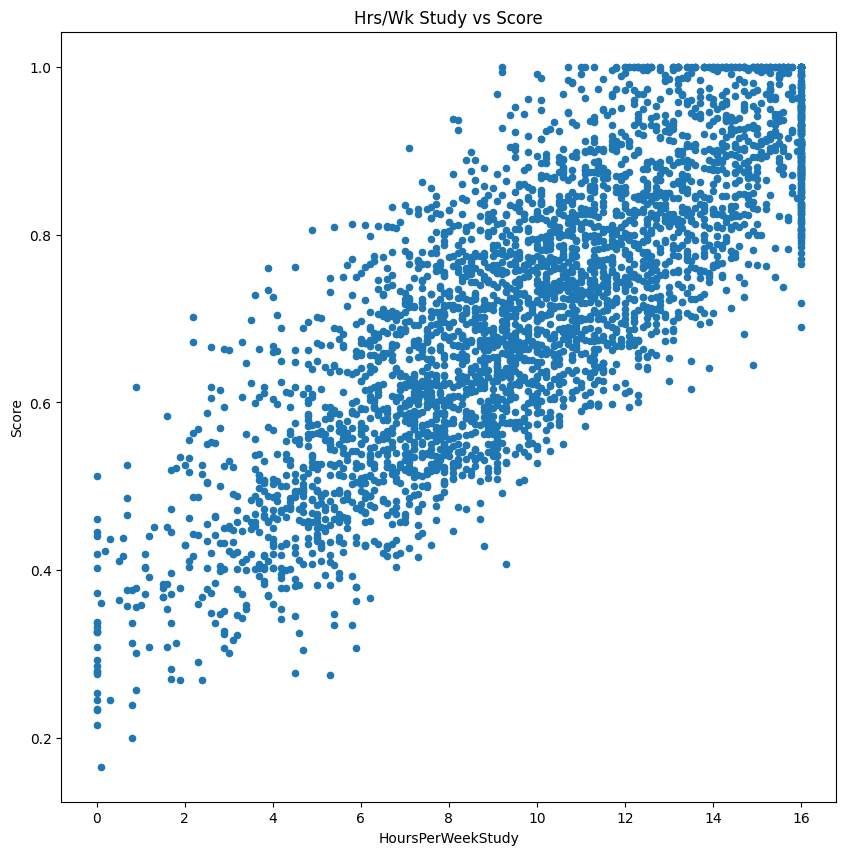

In [106]:
df1.plot.scatter("HoursPerWeekStudy", "Score", title="Hrs/Wk Study vs Score",figsize=(10,10))

<Axes: title={'center': 'Tutoring vs Score (Tutoring?)'}, xlabel='Tutoring', ylabel='Score'>

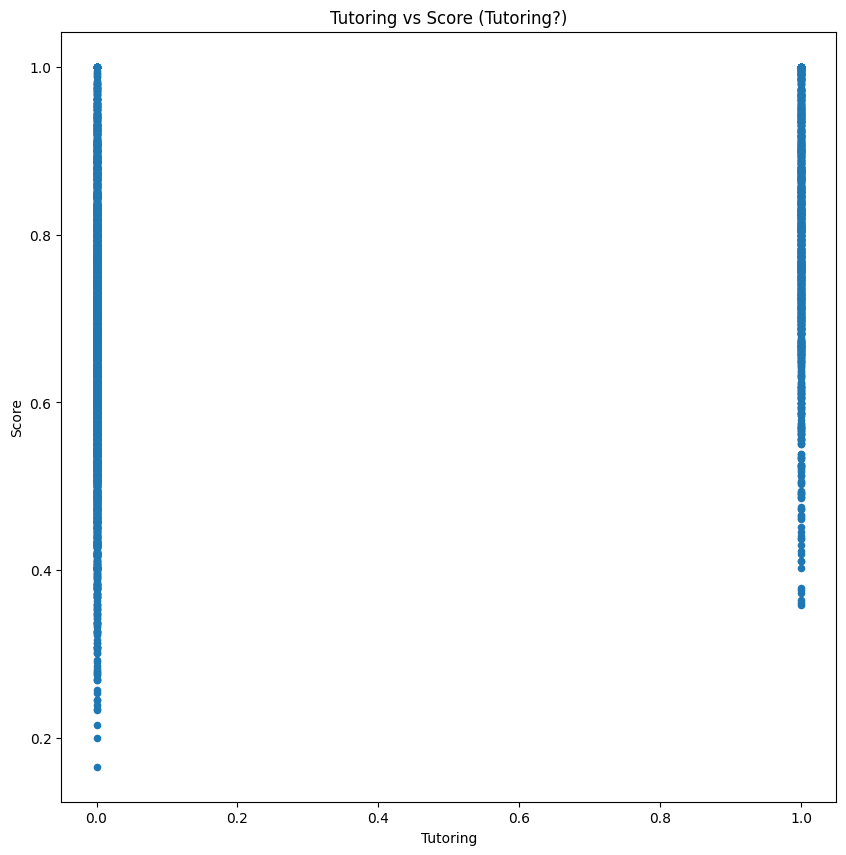

In [107]:
df1.plot.scatter("Tutoring", "Score", title="Tutoring vs Score (Tutoring?)", figsize=(10,10))

<Axes: title={'center': 'Region vs Score (Urban?)'}, xlabel='Region', ylabel='Score'>

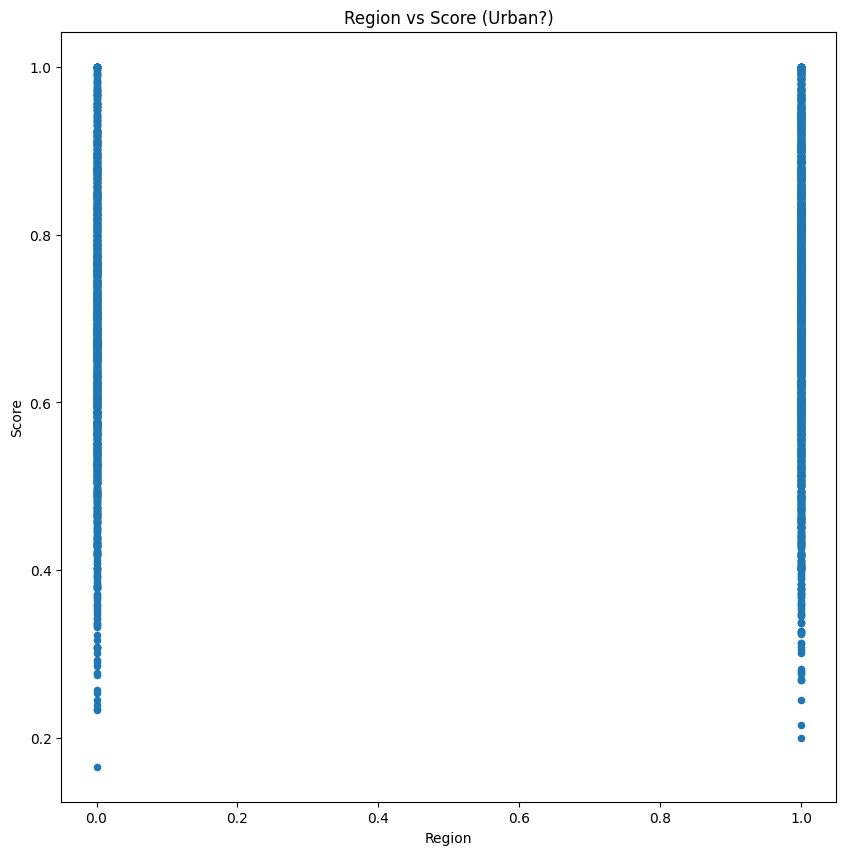

In [108]:
df1.plot.scatter("Region", "Score", title="Region vs Score (Urban?)", figsize=(10,10))

<Axes: title={'center': 'Attendance vs Score'}, xlabel='Attendance', ylabel='Score'>

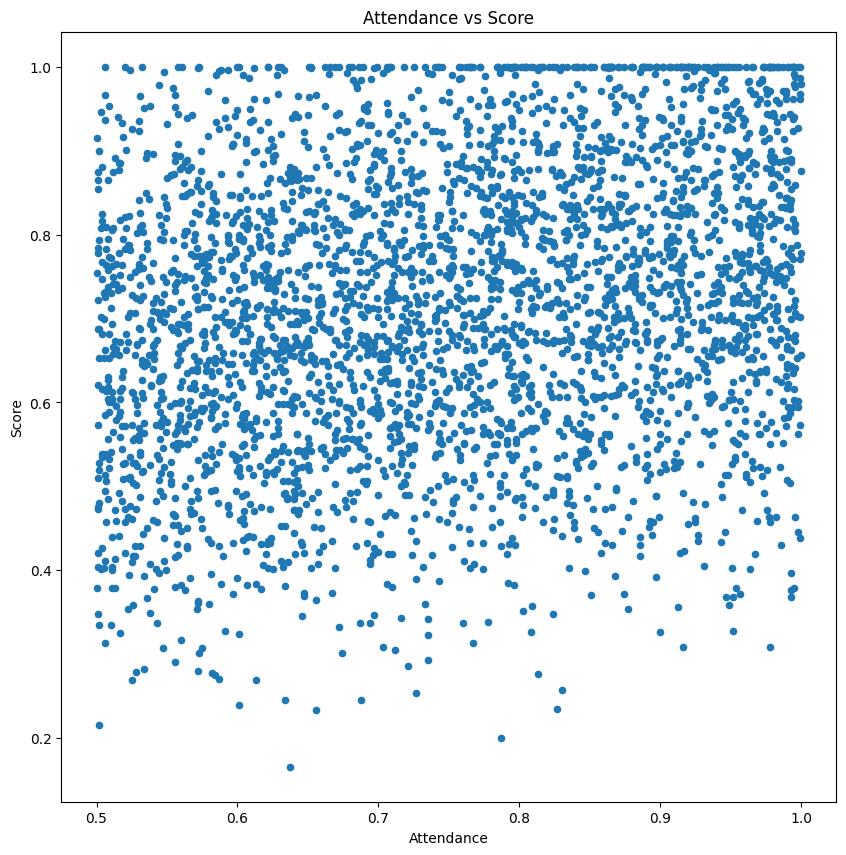

In [109]:
df1.plot.scatter("Attendance", "Score", title="Attendance vs Score", figsize=(10,10))

The above graph doesn't look so good for linear regression. In fact, I'd say it has no visible correlation at all. Let's see if a y~log(x) relation can change that.

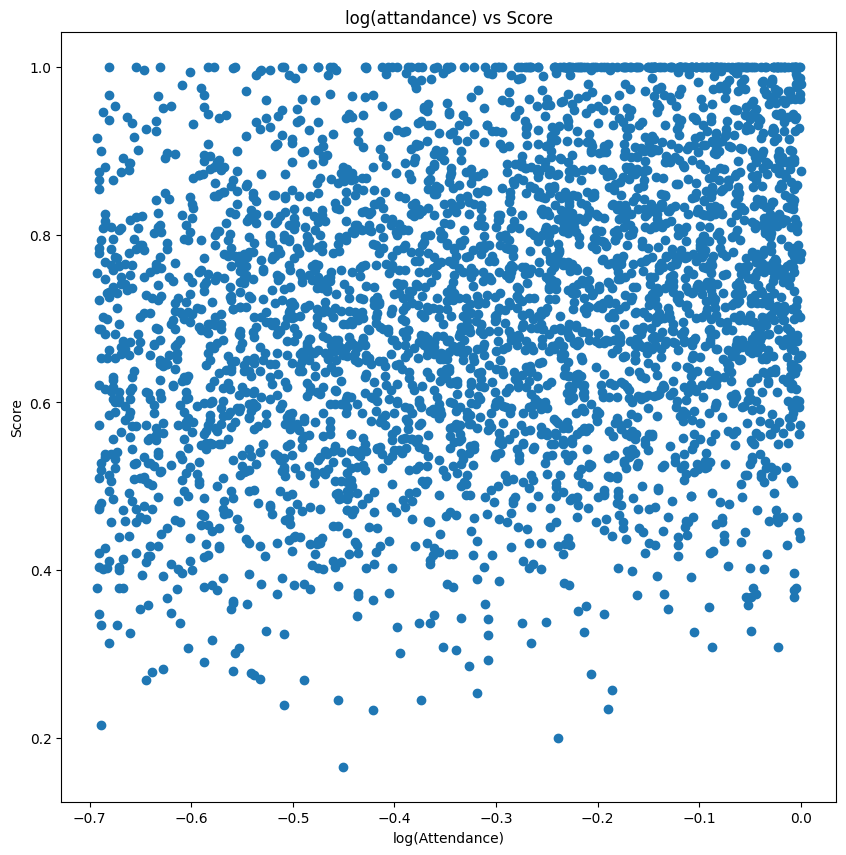

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
plt.title("log(attandance) vs Score")
plt.scatter(np.log(df1["Attendance"]), df1["Score"])
plt.xlabel("log(Attendance)")
plt.ylabel("Score")
plt.show()

Unfortunately, no luck. It still looks about the same, just a random looking dist to regular people, and a weak positive linear correlation to schitzos. 

<Axes: title={'center': 'ParentEdu vs Score'}, xlabel='ParentEdu', ylabel='Score'>

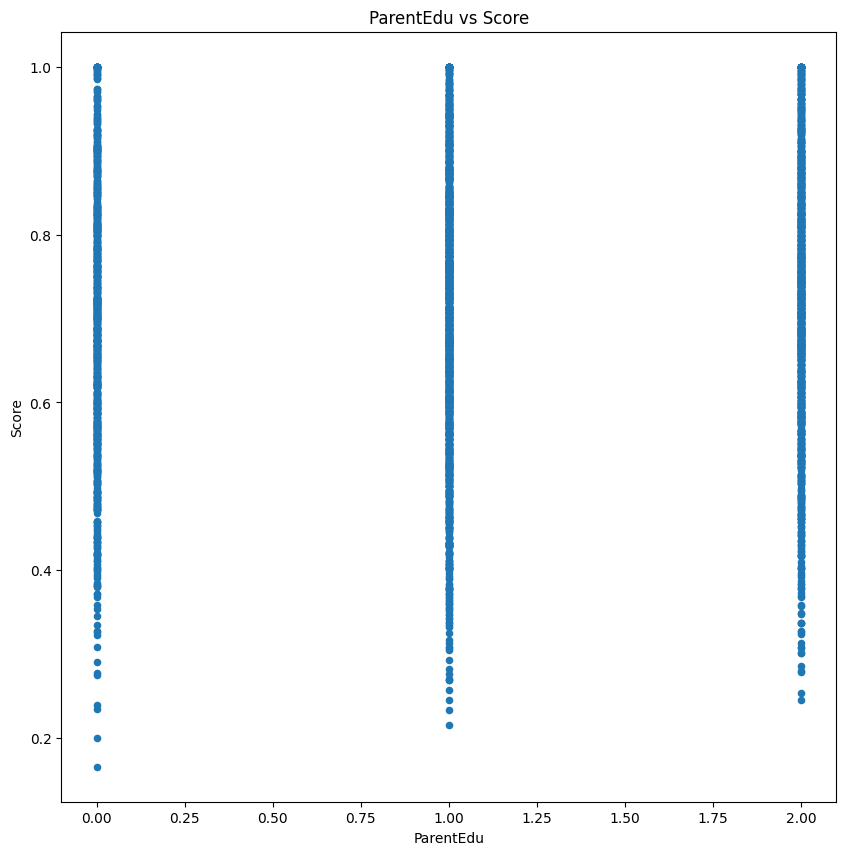

In [110]:
df1.plot.scatter("ParentEdu", "Score", title="ParentEdu vs Score", figsize=(10,10))

Summary: Most scatterplots present little information that we can visually see except for Hrs/Wk Studied. This graph shows a moderate to strong positive linear relation between hrs/wk studied and the resulting score. 

Another thing we can take away is that we need not apply a log transform to any of our independent variables, as none of them present with a non-linear relationship. 

In [ ]:
# Python df1 convert into R df1 (Credit: ChatGPT 5)
with localconverter(conversion.get_conversion() + pandas2ri.converter):
    r.assign("df1", pandas2ri.py2rpy(df1))

# Formula
r('myModel <- lm(Score ~ Sex + HoursPerWeekStudy + Tutoring + Region + Attendance + ParentEdu, data=df)')

# Makes the output screen look like R output (Credit: ChatGPT 5)
out = r('capture.output(summary(myModel))')
print("\n".join(list(out)))


Call:
lm(formula = Score ~ Sex + HoursPerWeekStudy + Tutoring + Region + 
    Attendance + ParentEdu, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18848 -0.03449  0.00044  0.03246  0.16234 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.0435183  0.0052843   8.235 2.48e-16 ***
Sex               0.0209004  0.0016642  12.559  < 2e-16 ***
HoursPerWeekStudy 0.0369716  0.0002241 164.964  < 2e-16 ***
Tutoring          0.1451354  0.0018005  80.609  < 2e-16 ***
Region            0.0306097  0.0017027  17.978  < 2e-16 ***
Attendance        0.2841795  0.0057374  49.531  < 2e-16 ***
ParentEdu         0.0177257  0.0011257  15.746  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04972 on 3571 degrees of freedom
Multiple R-squared:  0.9112,	Adjusted R-squared:  0.911 
F-statistic:  6106 on 6 and 3571 DF,  p-value: < 2.2e-16



For all our coefficients and the intercept, we are testing βi = 0 and βi ≠ 0 for the null and alternative hypotheses respectively. 

For the F-statistic, we are testing if βi, i ∈ {1, 2, ... , 6} = 0, or if that isn't true for the null and alts. 

For all coefficients, intercept, and the model, the p-vals are very low. 

Therefore, we reject the null hypothesis for all since the p-val is less than α, and we have convincing evidence that the intercepts and coefficients are different from 0, and that the overall model has explanatory power. 

This final section is about testing for heteroskedasticity. The core concept behind a distribution being homo/heteroskedastic is based on how the variance doesn't/will change depending on X. 

An example can be found below:

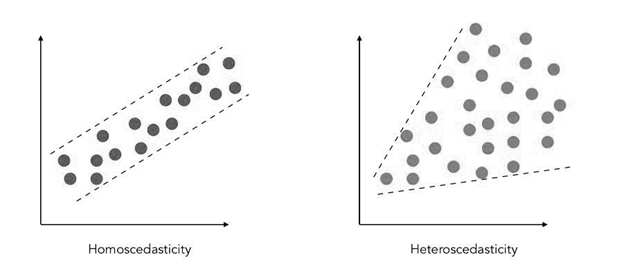

In [ ]:
from IPython.display import Image, display

display(Image(filename='/Users/raymo/Desktop/is312/homovshetero.png'))

An OLS model that we use spits out numbers like standard error that rely on the fact that the variance across the data is constant. Notice in the homoskedastic graph that no matter what value of X you might choose, the residuals of the model follow a distribution with a fixed variance. Compare this to the heteroskedastic graph, where the variance depends on the value of X.  


Essentially, the squared variance can be predicted by a linear model as well, and we can run an F-test for this model to see if it's valid, just like we did for the model on our actual data. 

Like with hypothesis tests for our variables, and the model as a whole, we can also do a test for heteroskedasticity. A pretty basic test for this is the Breusch Pagan test, and has null hypothesis of Ho: γ_i^2 = δ0 + δ1X1i + δ2X2i + ... + δkXki + Vi, and alternative hypothesis Ha: Ho not true. 

In [118]:
r("lmtest::bptest(myModel)")
out = r('capture.output(lmtest::bptest(myModel))')
print("\n".join(list(out)))


	studentized Breusch-Pagan test

data:  myModel
BP = 6.1897, df = 6, p-value = 0.4023



At basically any "good" α, we fail to reject the null hypothesis because the p-value is greater than our rejection threshold, and therefore, we do not have convincing evidence that our model is heteroskedastic. 

## **5. Findings & Conclusion**

Through our EDA, we have discovered that factors like the highest level of education attained by a student's parents, the urban/rural status of where a student lives, and whether a given student is being tutored or not, are correlated with substantial differences in Selectividad test scores. 

By training a linear regression model and analyzing the coefficients for each term in the equation, we find that the Attendance and Tutoring fields have the largest effect in the linear regression model, which mostly lines up with what we observed during EDA. 

In [235]:
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef}")

Sex: 0.02040947943260638
HoursPerWeekStudy: 0.036788887820701846
Tutoring: 0.1445139304398465
Region: 0.031912657887233506
Attendance: 0.28178847075637303
ParentEdu: 0.018235155721749653


Since Attendance and Tutoring are much better predictors on whether a student does well or not compared to variables like Sex or Parental Education, we should push for school districts and governments to fight for funds. These funds should be allocated to peer tutoring programs or in the best case, hiring "professionals" as tutors. Additionally, there should be much more attention paid into how to increase attendance rates. Unfortunately, we cannot eliminate disease as a reason for skipping, but if a student simply decides not to show up for no reason, this can be avoided. 

A similar effect was discovered with how much a student studies per week — generally, more study means more grades. This, according to the summary() output from R, is the largest contributor to the linear model. Additionally, it is most clear that students who study tend to have higher scores on the Selectavidid. While we certainly CANNOT establish causation and likely would need more research (ideally in double-blind randomized experiments) to confirm effects, this result can be used as a preliminary indicator or pointer for where larger, more substantial research should be pointed. By conducting significance testing, we can be sure that all these factors included in the SAP-4000 dataset actually contribute a lot to the overall model. 

At the end of the day, while the job of a school and teachers is to put math, science, english, etc. into the brains of the next generation, it's ultimately up to the students to open their minds up. But yet again, different students have different interests, which is why schools need increased funding from the government or literally anyone who can provide, so that schools can open a wide variety of high quality programs. If a student shows an apptitude for music yet is forced into track and field, it's like putting a saltwater fish into freshwater. With more programs, an art student CAN become an artist, and a STEM student CAN become an engineer or chemist, and neither is forced into something they are not, which ultimately also will drive attendance, and therefore test scores in the Selectividad. 

## **Z. Bibliography**

**Mateo, J. (2025). Student Academic Performance 4000 [Dataset]. In *Kaggle*. Retrieved June 16, 2025, from https://www.kaggle.com/datasets/firedmosquito831/student-academic-performance-simulation-4000**

**ChatGPT 5: **



## **ZZ. Peer Feedback**

*From Aditi Dixit*

*The chosen dataset of test scores in Spain and a variety of demographic information is interesting and I’m curious to see what you will find with further analysis. The code works so far, as long as the csv file is downloaded previously onto the computer of whoever is running the program. 
One area of improvement might be being more clear about who your audience is; like if it is parents trying to figure out how they can help their kids test scores, or teachers, or even students. Another area could be working on what the audience should do with the information. For example, if you find that students from a certain area have better scores, are you going to encourage people to move there or to look into the school and see what they may be doing differently? I think your planned outline structure is good, and covers everything you will need from the Intro, to EDA, to methodology ,etc. I would also recommend having the argument clearly stated before the data analysis as well, so it can be in the Introduction section, and then this is proven by the data through your analysis.*